In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
print(boston_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston_data["target"])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
data = pd.DataFrame(boston_data["data"],columns=boston_data["feature_names"])

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
data["MEDV"] = boston_data["target"]

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = linear_model.predict(X_test)
y_pred

array([22.54818924, 28.98078263, 17.94979377, 40.08613018, 19.15295305,
       30.07196993,  8.19057107, 19.79703558, 19.05935894, 25.35348118,
       11.51560582, 44.04462033, 17.04134668, 27.7057597 , 24.511721  ,
       20.55259295, 23.70948388, 24.19747057, 16.75227228, 28.23022659,
       33.30850745, 35.01062346, 20.763038  , 28.8348829 , 25.52995082,
       19.13569542, 33.02378372, 19.74421796, 21.60646728, 23.10844883,
       25.74979503, 24.27993315, 31.93641424, 25.28506744, 15.79706656,
       13.22139404, 25.43572688, 39.47997566, 16.06017516, 24.20280773,
        1.37741428, 25.0901249 , 19.12341313, 30.2249535 , 16.65595309,
       20.58040459, 17.23840301, 32.25796906, 20.07419443, 21.99079595,
       18.30227934, 41.76003285, 27.47714755, 14.54898408, 40.13447914,
       18.29240276, 27.51617576, 32.49030418, 19.28406238, 21.72786525,
       21.92556807,  8.49162169, 31.19220158, 14.01080625, 10.40164471,
       35.02073471, 39.93812129, 22.83200782, 21.89296183, 21.84

In [29]:
linear_model.coef_

array([-1.12846248e-01,  4.70041888e-02,  2.77768589e-02,  2.93737813e+00,
       -1.92718701e+01,  3.24130101e+00,  4.96616971e-03, -1.45643274e+00,
        3.60900296e-01, -1.42362847e-02, -8.94657662e-01,  9.60761573e-03,
       -5.60303703e-01])

In [30]:
lm_coeff = pd.DataFrame(linear_model.coef_,columns=["coeff"])
lm_coeff["Feature_name"] = X.columns

In [31]:
lm_coeff

,coeff,Feature_name
0,-0.112846,CRIM
1,0.047004,ZN
2,0.027777,INDUS
3,2.937378,CHAS
4,-19.271870,NOX
5,3.241301,RM
6,0.004966,AGE
7,-1.456433,DIS
8,0.360900,RAD
9,-0.014236,TAX


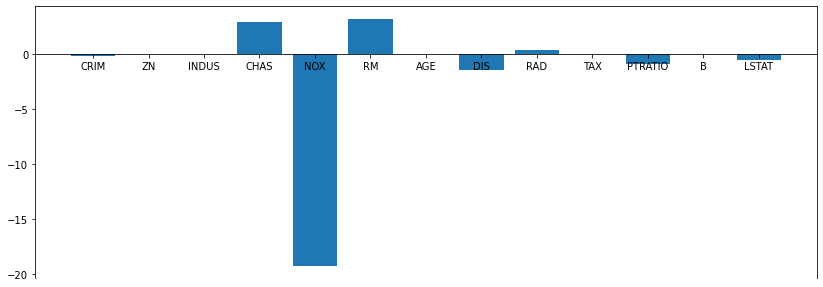

In [32]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(lm_coeff["Feature_name"], lm_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  3.994232954110534
RSquared is: 82.26%


# Lasso Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [42]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train,y_train)

Lasso(alpha=1)

In [43]:
y_pred = lasso_r.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  5.083136596911354
RSquared is: 71.28%


In [45]:
lassor_coeff = pd.DataFrame(lasso_r.coef_,columns=["coeff"])
lassor_coeff["Feature_name"] = X.columns
lassor_coeff

,coeff,Feature_name
0,-0.071314,CRIM
1,0.045675,ZN
2,-0.000000,INDUS
3,0.000000,CHAS
4,-0.000000,NOX
5,0.505469,RM
6,0.026944,AGE
7,-0.500121,DIS
8,0.328668,RAD
9,-0.018165,TAX


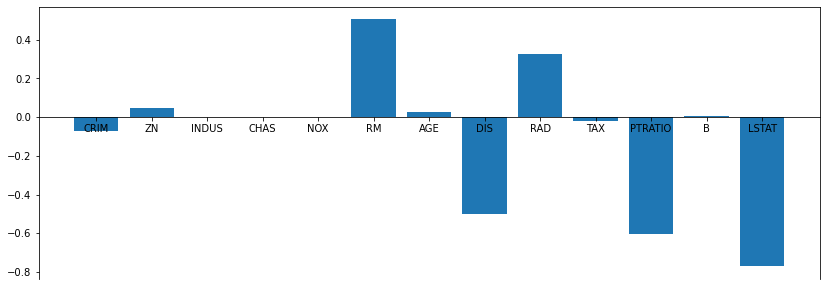

In [46]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(lassor_coeff["Feature_name"], lassor_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

# Ridge Regression - L2

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [51]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha=3)
lm_r.fit(X_train,y_train)

Ridge(alpha=3)

In [52]:
y_pred = lm_r.predict(X_test)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.01545280638004
RSquared is: 82.08%


In [55]:
ridger_coeff = pd.DataFrame(lm_r.coef_,columns=["coeff"])
ridger_coeff["Feature_name"] = X.columns
ridger_coeff

,coeff,Feature_name
0,-0.107188,CRIM
1,0.048723,ZN
2,-0.026723,INDUS
3,2.315133,CHAS
4,-5.426870,NOX
5,3.297910,RM
6,-0.006112,AGE
7,-1.233440,DIS
8,0.330670,RAD
9,-0.015524,TAX


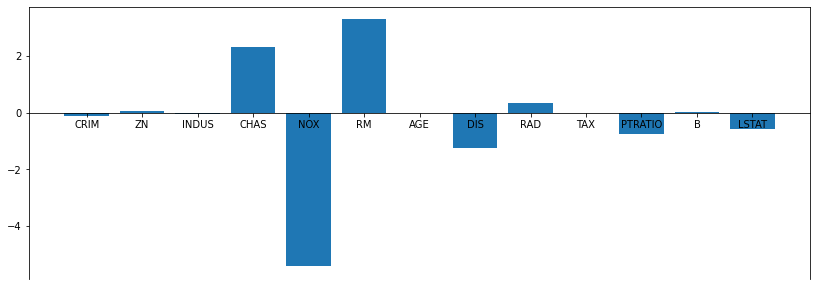

In [56]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(ridger_coeff["Feature_name"], ridger_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()